# Credit Risk Evaluator

In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [14]:
# Import the data
lending_df = pd.read_csv('Resources/lending_data.csv')
lending_df


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

My prediction is that the logistical regression will perform better. 1. We are trying to determine the relationship between the features and a target variable. 2. The dataset does not contain a large amount of features (columns?) and observations (rows?). 

## Split the Data into Training and Testing Sets

In [28]:
# Define the X (features) and y (target) sets
y = lending_df["loan_status"].values
X = lending_df.drop("loan_status", axis=1)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


In [18]:
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [36]:
# what is the difference between classifier and model?....

# Train a Logistic Regression model and print the model score

# Creating the logistical regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs', random_state=1)
classifier

# fit model using training data
classifier.fit(X_train, y_train)
training_score = classifier.score(X_train, y_train)
testing_score = classifier.score(X_test, y_test)

# print training and test scores
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")



Training Score: 0.9921240885954051
Testing Score: 0.9918489475856377


In [37]:
# Train a Random Forest Classifier model and print the model score
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')


Training Score: 0.9975409272252029
Testing Score: 0.991642591828312


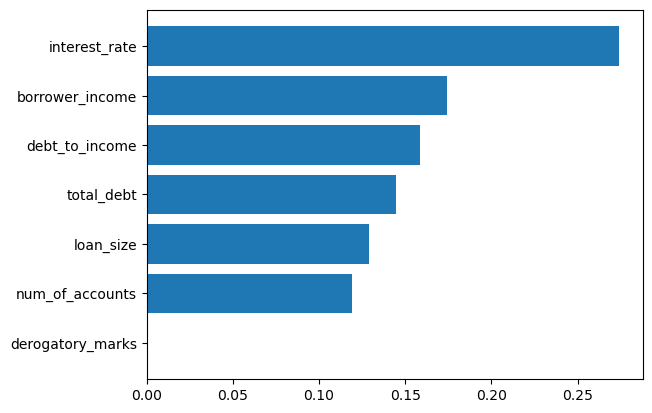

In [33]:
# Extra... just wanted to see how these were weighted in random forest
feature_importances = clf.feature_importances_

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

ax.barh(y=cols, width=width)

plt.show()

Both of the models were very close in terms of score, but the logisitical regression model had a very slight edge on the test score. 